In [2]:
#Loading necessary Libs for workshop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
#Load dataframe with pandas from DataSet folder
house_data = pd.read_csv("../DataSet/clean_house_data.csv", sep=";", decimal=",")
#Describe dataset specifications
house_data.describe

<bound method NDFrame.describe of      price  surface  arrondissement
0     1820    46.10               1
1     1750    41.00               1
2     1900    55.00               1
3     1950    46.00               1
4     1950    49.00               1
..     ...      ...             ...
809    850    35.00              10
810    700    10.00              10
811   1280    34.00              10
812   1545    65.00              10
813   1000    21.43              10

[814 rows x 3 columns]>

In [70]:
#first ten lines
house_data.head(10)

,price,surface,arrondissement
0,1820,46.1,1
1,1750,41.0,1
2,1900,55.0,1
3,1950,46.0,1
4,1950,49.0,1
5,1960,67.0,1
6,2000,35.0,1
7,1900,90.6,1
8,2050,60.0,1
9,2100,47.0,1


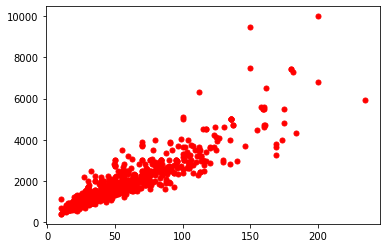

In [71]:
#Vizualize the data with y = surface and x = price 
plt.plot(house_data["surface"], house_data["price"], "ro", markersize=5)
plt.show()

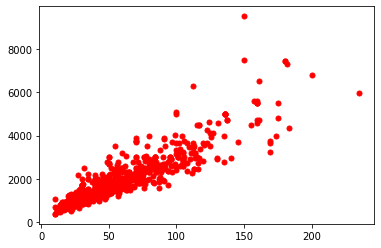

In [72]:
#kill the outliers
house_data_inside_10 = house_data[house_data["price"] < 10000]
house_data_inside_10.dropna(how='all')
#Vizualize the data with y = surface and x = price and < 10k
plt.plot(house_data_inside_10["surface"], house_data_inside_10["price"], "ro", markersize=5)
plt.show()
#it does look like a line now

In [73]:
#lets build the matrix to train the model 
#ones return an array of ones for the specified column
X = np.matrix([np.ones(house_data_inside_10.shape[0]), house_data_inside_10['surface'].values]).T
y = np.matrix(house_data_inside_10['price']).T
X[:10]


matrix([[ 1. , 46.1],
        [ 1. , 41. ],
        [ 1. , 55. ],
        [ 1. , 46. ],
        [ 1. , 49. ],
        [ 1. , 67. ],
        [ 1. , 35. ],
        [ 1. , 90.6],
        [ 1. , 60. ],
        [ 1. , 47. ]])

In [74]:
#where theta is the lowest the loss function is lowest too so the better
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
#print theta 
print(theta)
#weird output to check 

[[255.82253034]
 [ 28.98730991]]


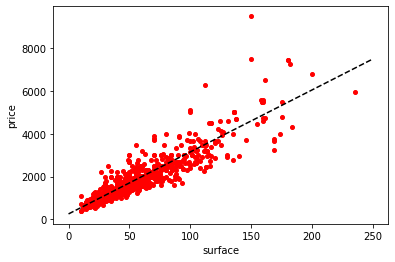

In [89]:
#definition des labels
plt.xlabel('surface')
plt.ylabel('price')
#plot graph 
plt.plot(house_data_inside_10['surface'], house_data_inside_10['price'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [90]:
#train the model with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.predict([[0, 350]])

array([[10401.38099859]])

In [91]:
#tryout split the dataset into 80/20 for training and testing. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)